<a href="https://colab.research.google.com/github/varshaka234/Sentimental-analysis-of-customer-reviews/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd # Import the pandas library

# Assuming your data is in a CSV file named 'your_data.csv' in your Google Drive
file_path = '/content/yelp.csv'  # Replace with the actual path
df = pd.read_csv(file_path) # Read the CSV file into a DataFrame named 'df'

df.info()  # Now you can call info() on the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
import pandas as pd # Import the pandas library

# Assuming your data is in a CSV file named 'your_data.csv' in your Google Drive
file_path = '/content/yelp.csv'  # Replace with the actual path
df = pd.read_csv(file_path) # Read the CSV file into a DataFrame named 'df'

df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,26-01-2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,27-07-2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,14-06-2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,27-05-2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,05-01-2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
total_reviews = df.shape[0]
print(f'Total reviews: {total_reviews}')


Total reviews: 10000


In [ ]:
df['stars'].value_counts()


,count
stars,
4,3526
5,3337
3,1461
2,927
1,749


In [ ]:
# Check for missing values in the text column
print(df['text'].isnull().sum())

0


In [ ]:
print(df.columns)  # Ensure 'text' column exists


Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


<ipython-input-49-d82f012abc1f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['stars'], palette='viridis')


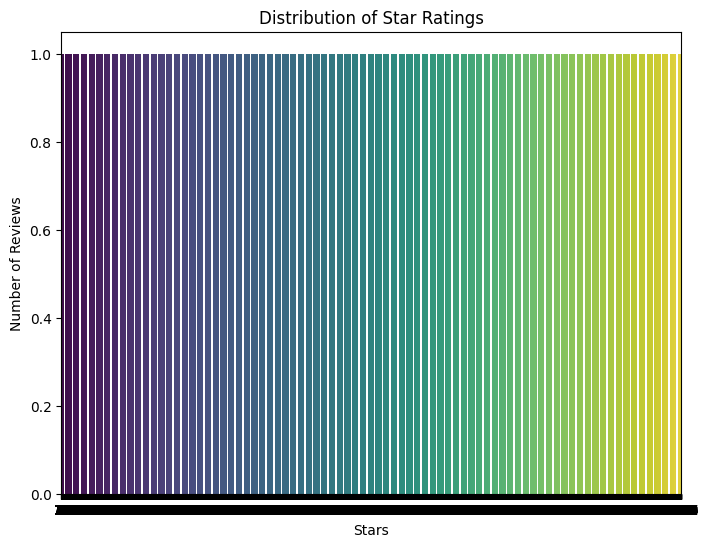

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of star ratings
plt.figure(figsize=(8,6))
sns.countplot(df['stars'], palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.show()


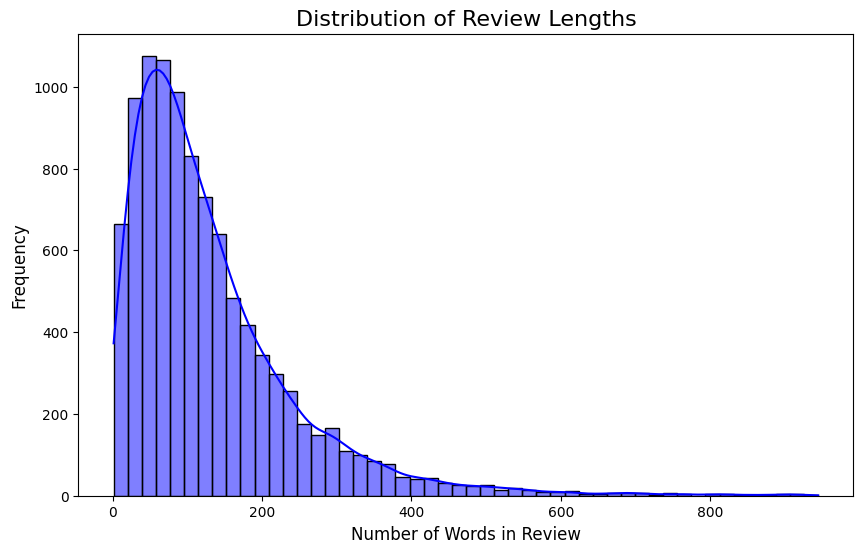

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot histogram of review lengths directly
sns.histplot(df['text'].apply(lambda x: len(x.split())), bins=50, kde=True, color='blue')

# Add title and labels
plt.title('Distribution of Review Lengths', fontsize=16)
plt.xlabel('Number of Words in Review', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


<ipython-input-23-351a08db6936>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stars', y='text', data=average_review_length, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

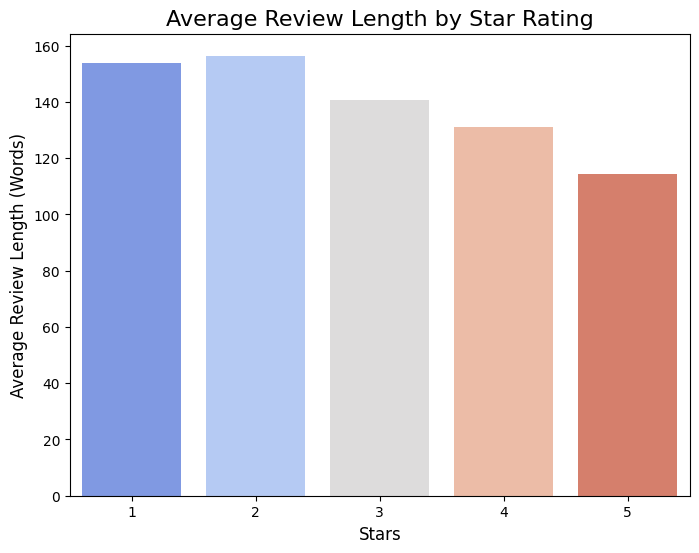

In [ ]:
# Calculate average review length by star rating on the fly
average_review_length = df.groupby('stars')['text'].apply(lambda x: x.str.split().str.len().mean()).reset_index()

# Plot the average review length by star rating
plt.figure(figsize=(8, 6))
sns.barplot(x='stars', y='text', data=average_review_length, palette='coolwarm')

# Add title and labels
plt.title('Average Review Length by Star Rating', fontsize=16)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Average Review Length (Words)', fontsize=12)

# Show the plot
plt.show()


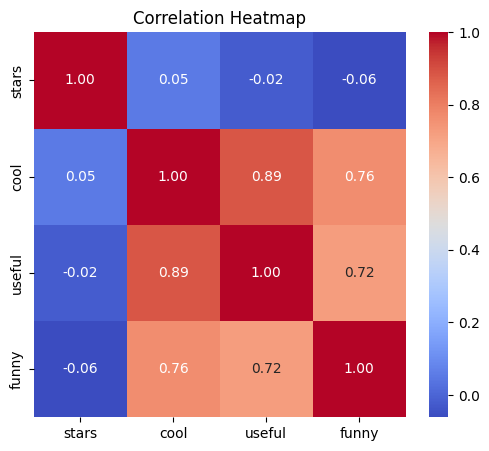

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title and show the plot
plt.title('Correlation Heatmap')
plt.show()


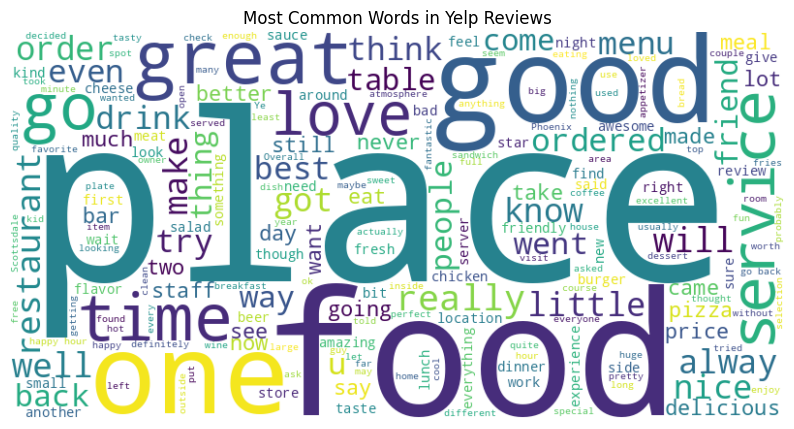

In [ ]:
# Ensure necessary imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud for the reviews
text = ' '.join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Common Words in Yelp Reviews')
plt.show()


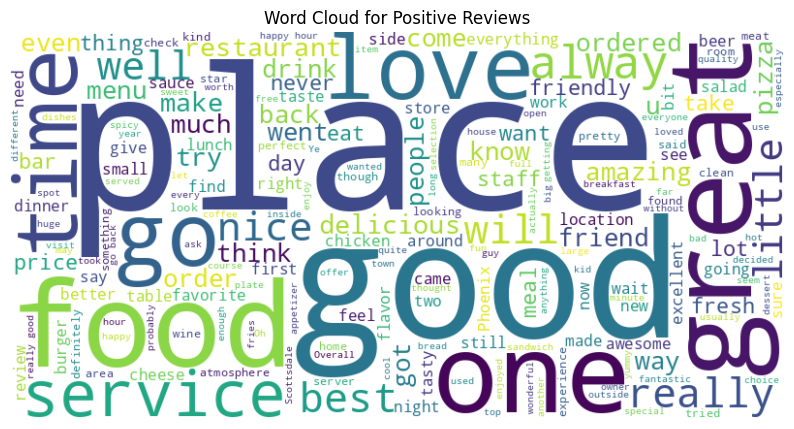

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_text = ' '.join(positive_reviews['text'].astype(str).tolist())  # Convert reviews to a single string
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud for positive reviews
plt.figure(figsize=(10,6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis for a clean look
plt.title('Word Cloud for Positive Reviews')
plt.show()


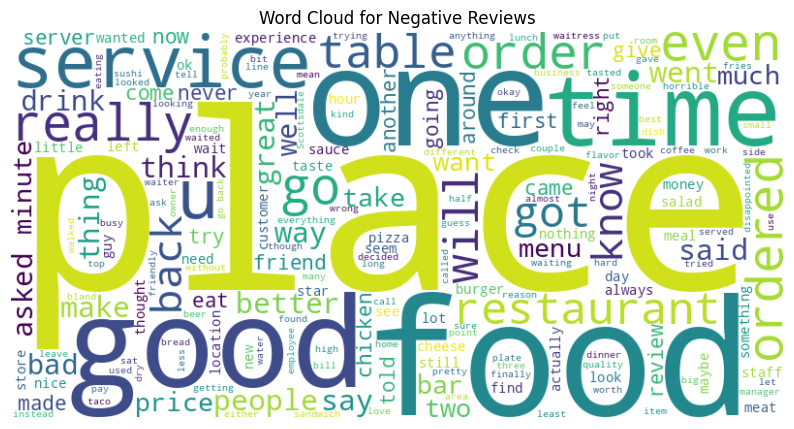

In [ ]:
# Generate word cloud for negative reviews
negative_text = ' '.join(negative_reviews['text'].astype(str).tolist())  # Convert reviews to a single string
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud for negative reviews
plt.figure(figsize=(10,6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis for a clean look
plt.title('Word Cloud for Negative Reviews')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Ensure plots display inline (for environments like Jupyter Notebook or Google Colab)
%matplotlib inline


In [ ]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('yelp.csv')

# Now you can print the columns

print(df.columns)


Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [ ]:
from collections import Counter
import pandas as pd

# Assuming you already have 'text' column in your dataframe
# Step 1: Filter reviews based on length
short_reviews = df[df['text'].apply(lambda x: len(x.split()) <= 200)]

# Step 2: Tokenization and counting word frequency
words = ' '.join(short_reviews['text']).split()  # Join all reviews and split into words
word_counts = Counter(words)

# Step 3: Get the most common words
most_common_words = word_counts.most_common(10)  # Get top 10 most common words

# Convert to DataFrame for better visualization
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Display the DataFrame
print(common_words_df)


  Word  Frequency
0  the      28849
1  and      23414
2    a      18661
3    I      18626
4   to      15456
5   is      10523
6   of      10300
7  was      10011
8  for       8122
9   in       7393


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the Yelp dataset
df = pd.read_csv('yelp.csv', on_bad_lines='skip')

# Step 1: Remove missing data
df.dropna(subset=['text'], inplace=True)

# Step 2: Convert text to lowercase
df['text'] = df['text'].str.lower()

# Step 3: Remove punctuation
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))

# Step 4: Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(remove_stopwords)

# Step 5: Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['text'] = df['text'].apply(lemmatize_text)

# Step 6: Save the preprocessed dataset to a new CSV file
df.to_csv('yelp_preprocessed.csv', index=False)

# Step 7: Display the first few rows of the preprocessed data
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  26-01-2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  27-07-2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  14-06-2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  27-05-2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  05-01-2012  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  wife took birthday breakfast excellent weather...  review   
1  idea people give bad review place go show plea...  review   
2  love gyro plate rice good also dig candy selec...  review   
3  rosie dakota love chaparral dog park convenien...  review   
4  general manager scott petello good egg go deta...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [ ]:


# Load the Yelp dataset
df = pd.read_csv('yelp.csv', on_bad_lines='skip')


# Keep only the 'text' column
df = df[['text']]

# Step 7: Save the preprocessed dataset to a new CSV file
df.to_csv('cleaned_yelp_reviews.csv', index=False)

# Step 8: Display the first few rows of the preprocessed data
print(df.head())


                                                text
0  My wife took me here on my birthday for breakf...
1  I have no idea why some people give bad review...
2  love the gyro plate. Rice is so good and I als...
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4  General Manager Scott Petello is a good egg!!!...


In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import re

# Load your preprocessed dataset
df = pd.read_csv('yelp_preprocessed.csv')  # Adjust the file name if needed

# Define a cleaning function
def clean_review(review):
    # Remove special characters, numbers, and extra spaces
    review = re.sub(r'[^a-zA-Z\s]', '', review)  # Keep only alphabets and spaces
    review = re.sub(r'\s+', ' ', review).strip()  # Remove extra spaces
    return review

# Apply the cleaning function to the reviews
df['cleaned_text'] = df['text'].apply(clean_review)

# Display the first 10,000 cleaned reviews
cleaned_reviews = df['cleaned_text'].head(10000)
print(cleaned_reviews)




0       wife took birthday breakfast excellent weather...
1       idea people give bad review place go show plea...
2       love gyro plate rice good also dig candy selec...
3       rosie dakota love chaparral dog park convenien...
4       general manager scott petello good egg go deta...
                              ...                        
9995    first visithad lunch today used groupon ordere...
9996    called house deliciousness could go item item ...
9997    recently visited olive ivy business last week ...
9998    nephew moved scottsdale recently bunch friend ...
9999    location star average think arizona really fan...
Name: cleaned_text, Length: 10000, dtype: object


In [ ]:
!apt-get install -y openjdk-8-jdk


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei
  fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-

In [ ]:
!java -version


openjdk version "11.0.24" 2024-07-16
OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04)
OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)


In [ ]:
!unzip /content/SentiStrengthDataEnglishOctober2019.zip -d /content/SentiStrength_Data


Archive:  /content/SentiStrengthDataEnglishOctober2019.zip
  inflating: /content/SentiStrength_Data/IdiomLookupTable.txt  
  inflating: /content/SentiStrength_Data/SentimentLookupTable.txt  
  inflating: /content/SentiStrength_Data/NegatingWordList.txt  
  inflating: /content/SentiStrength_Data/SlangLookupTable.txt  
  inflating: /content/SentiStrength_Data/BoosterWordList.txt  
  inflating: /content/SentiStrength_Data/Dictionary.txt  
  inflating: /content/SentiStrength_Data/IronyTerms.txt  
  inflating: /content/SentiStrength_Data/QuestionWords.txt  
  inflating: /content/SentiStrength_Data/EmoticonLookupTable.txt  


In [ ]:
!ls /content/SentiStrength_Data


BoosterWordList.txt	 IdiomLookupTable.txt  QuestionWords.txt
Dictionary.txt		 IronyTerms.txt        SentimentLookupTable.txt
EmoticonLookupTable.txt  NegatingWordList.txt  SlangLookupTable.txt


In [ ]:
import pandas as pd
import subprocess
import re

# Load your dataset (adjust the file name as needed)
df = pd.read_csv('yelp_preprocessed.csv')

# Check the column name that contains the reviews
# Assume it's 'lemmatized_text' or the correct column name after checking
if 'lemmatized_text' in df.columns:
    text_column = 'lemmatized_text'
else:
    text_column = 'text'  # Use the correct column here if needed

# Define a cleaning function if needed
def clean_review(review):
    # Remove special characters, numbers, and extra spaces
    review = re.sub(r'[^a-zA-Z\s]', '', str(review))  # Keep only alphabets and spaces
    review = re.sub(r'\s+', ' ', review).strip()  # Remove extra spaces
    return review

# Apply the cleaning function to the reviews
df['cleaned_text'] = df[text_column].apply(clean_review)

# Select a small subset of the dataset for testing
subset_df = df.head(10)  # Adjust the number of reviews

# Function to calculate sentiment using SentiStrength
def get_sentiment(text):
    try:
        # Execute the SentiStrength tool
        process = subprocess.Popen(
            ['java', '-jar', 'SentiStrength.jar', 'sentidata', '/content/SentiStrength_Data/', 'text', text],
            stdout=subprocess.PIPE, stderr=subprocess.PIPE)

        result, error = process.communicate()

        # Check for any errors
        if error:
            print(f"Error occurred while processing the text: {text}\nError: {error.decode('utf-8')}")
            return None

        # Return the result, which contains positive and negative sentiment scores
        return result.decode('utf-8').strip()
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

# Apply the SentiStrength function to the subset of reviews
subset_df['sentiment'] = subset_df['cleaned_text'].apply(get_sentiment)

# Display the sentiment scores for the subset
print(subset_df[['cleaned_text', 'sentiment']])


                                        cleaned_text sentiment
0  wife took birthday breakfast excellent weather...      4 -2
1  idea people give bad review place go show plea...      4 -2
2  love gyro plate rice good also dig candy selec...      3 -1
3  rosie dakota love chaparral dog park convenien...      3 -2
4  general manager scott petello good egg go deta...      4 -2
5  quiessence simply put beautiful full window ea...      4 -3
6  drop youre drive ate go back next day food goo...      5 -3
7  luckily didnt travel far make connecting fligh...      3 -1
8  definitely come happy hour price amazing sake ...      5 -2
9  nobuo show unique talent everything menu caref...      2 -1


<ipython-input-14-e1a4f5ae7c7e>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['sentiment'] = subset_df['cleaned_text'].apply(get_sentiment)


In [ ]:
import pandas as pd
import numpy as np

# Sample dataset with sentiment scores
data = {'text': ['Amazing food!', 'Terrible service.', 'It was okay.', 'Not bad.', 'Awful experience.'],
        'sentiment_score': [5, -3, 0, 2, -4]}

df = pd.DataFrame(data)

# Calculate mean and standard deviation of sentiment scores
mean_score = df['sentiment_score'].mean()
std_dev = df['sentiment_score'].std()

print(f"Mean Score: {mean_score}, Standard Deviation: {std_dev}")

# Function to assign labels based on score using mean and standard deviation
def score_to_label_std(score, mean, std_dev):
    if score > (mean + std_dev):
        return 'Positive'
    elif score < (mean - std_dev):
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to convert sentiment scores to labels
df['sentiment'] = df['sentiment_score'].apply(score_to_label_std, args=(mean_score, std_dev))

# Display the resulting DataFrame
print(df[['text', 'sentiment_score', 'sentiment']])


Mean Score: 0.0, Standard Deviation: 3.6742346141747673
                text  sentiment_score sentiment
0      Amazing food!                5  Positive
1  Terrible service.               -3   Neutral
2       It was okay.                0   Neutral
3           Not bad.                2   Neutral
4  Awful experience.               -4  Negative


In [ ]:
import pandas as pd
import subprocess
import re

# Load dataset
df = pd.read_csv('yelp_preprocessed.csv')

# Determine text column
text_column = 'lemmatized_text' if 'lemmatized_text' in df.columns else 'text'

# Clean review function
def clean_review(review):
    review = re.sub(r'[^a-zA-Z\s]', '', str(review))  # Keep only alphabets and spaces
    review = re.sub(r'\s+', ' ', review).strip()  # Remove extra spaces
    return review

# Clean text data
df['cleaned_text'] = df[text_column].apply(clean_review)

# Select a subset for testing
subset_df = df.head(10)

# SentiStrength function
def get_sentiment(text):
    try:
        process = subprocess.Popen(
            ['java', '-jar', 'SentiStrength.jar', 'sentidata', '/content/SentiStrength_Data/', 'text', text],
            stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        result, error = process.communicate()

        if error:
            print(f"Error: {error.decode('utf-8')}")
            return None

        sentiment_scores = result.decode('utf-8').strip()
        # Expected format: "PositiveScore NegativeScore"
        scores = sentiment_scores.split(' ')

        # Convert scores to integers and return
        return int(scores[0]), int(scores[1])  # Positive, Negative
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

# Apply SentiStrength and parse scores
subset_df['sentiment_scores'] = subset_df['cleaned_text'].apply(get_sentiment)

# Separate positive and negative scores into columns
subset_df[['positive_score', 'negative_score']] = pd.DataFrame(subset_df['sentiment_scores'].tolist(), index=subset_df.index)

# Drop rows with None values from errors (optional)
subset_df.dropna(subset=['positive_score', 'negative_score'], inplace=True)

# Calculate mean and std deviation
positive_mean = subset_df['positive_score'].mean()
negative_mean = subset_df['negative_score'].mean()
positive_std_dev = subset_df['positive_score'].std()
negative_std_dev = subset_df['negative_score'].std()

# Classify each review based on standard deviation
def classify_review(row):
    if row['positive_score'] > positive_mean + positive_std_dev / 2 and row['negative_score'] < negative_mean:
        return "Positive"
    elif row['negative_score'] > negative_mean + negative_std_dev / 2 and row['positive_score'] < positive_mean:
        return "Negative"
    else:
        return "Neutral"

# Apply classification
subset_df['review_sentiment'] = subset_df.apply(classify_review, axis=1)

# Display the sentiment classification
print(subset_df[['cleaned_text', 'positive_score', 'negative_score', 'review_sentiment']])


                                        cleaned_text  positive_score  \
0  wife took birthday breakfast excellent weather...               4   
1  idea people give bad review place go show plea...               4   
2  love gyro plate rice good also dig candy selec...               3   
3  rosie dakota love chaparral dog park convenien...               3   
4  general manager scott petello good egg go deta...               4   
5  quiessence simply put beautiful full window ea...               4   
6  drop youre drive ate go back next day food goo...               5   
7  luckily didnt travel far make connecting fligh...               3   
8  definitely come happy hour price amazing sake ...               5   
9  nobuo show unique talent everything menu caref...               2   

   negative_score review_sentiment  
0              -2          Neutral  
1              -2          Neutral  
2              -1         Negative  
3              -2          Neutral  
4              -2     

<ipython-input-16-4a32c44c5e5f>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['sentiment_scores'] = subset_df['cleaned_text'].apply(get_sentiment)
<ipython-input-16-4a32c44c5e5f>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive_score', 'negative_score']] = pd.DataFrame(subset_df['sentiment_scores'].tolist(), index=subset_df.index)
<ipython-input-16-4a32c44c5e5f>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [ ]:
import gradio as gr
!pip install sentistrength
from sentistrength import PySentiStr

# Initialize SentiStrength
senti = PySentiStr()
senti.setSentiStrengthPath('SentiStrength.jar')  # path to the SentiStrength jar file
senti.setSentiStrengthLanguageFolderPath('SentiStrength_Data/')  # path to the SentiStrength data folder

# Define a function for sentiment analysis
def sentiment_analysis(review_text):
    # Run sentiment analysis on the text
    sentiment_score = senti.getSentiment(review_text)

    # Interpret the result
    if sentiment_score[0] > 0:
        return "Positive"
    elif sentiment_score[0] < 0:
        return "Negative"
    else:
        return "Neutral"

# Set up Gradio interface
iface = gr.Interface(
    fn=sentiment_analysis,
    inputs="text",
    outputs="text",
    title="SENTIMENT ANALYSIS OF CUSTOMER REVIEWS",
    description="Enter a review and get its sentiment analysis result (Positive, Negative, Neutral)."
)

# Launch the Gradio app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://90a2be7b09eac40767.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
